In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, find_max, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume-no', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.37)_(0.39).hdf5',
 '/home2/s20321

In [10]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
c = 0.5*(c1+c2)
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

In [11]:
mcmc_dm_dir = join(root_data_dir, "MCMC-no", "no", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data'

In [12]:
dm_2_files = glob(join(mcmc_dm_dir, "chain-2-*"))
dm_2_files.sort()
dm_2_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-00.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-01.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-02.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-03.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-04.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-05.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-06.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-07.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-08.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-09.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-10.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-11.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no/data/chain-2-12.npy']

In [31]:
# import os
# for i in range(len(dm_2_files)):
#     oldname = join(mcmc_dm_dir, f"chain-2-{i}.npy")
#     print("old:", oldname)
#     newname = join(mcmc_dm_dir, f"chain-2-{i:02d}.npy")
#     print("new:", newname)
#     os.rename(oldname, newname)

## tes

In [13]:
index = 2
df = np.load(join(mcmc_dm_dir, f"chain-2-{index:02d}.npy"))
df.shape

(20000, 66, 32)

In [14]:
rhob = df[:, :, :12]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

rhoD = rhob - rhob0

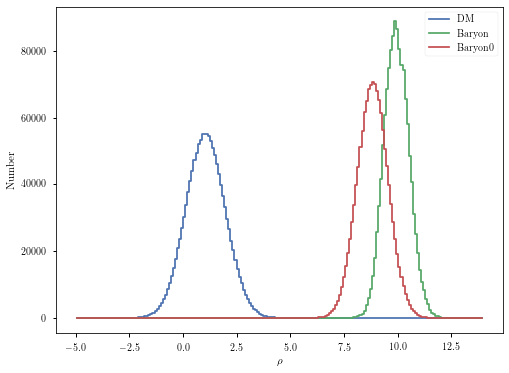

In [16]:
rho = np.linspace(-5, 14, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [17]:
rhoD_sample = np.random.choice(rhoD, size=2000, replace=False)
rhoD_fit = skewnorm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=2000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=2000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((0.7858313329918767, 0.6294325015107433, 1.0222395693226296),
 (1.132729148709779, 9.578351511662792, 0.710908240846716),
 (8.896385208554962, 0.7174549559193153))

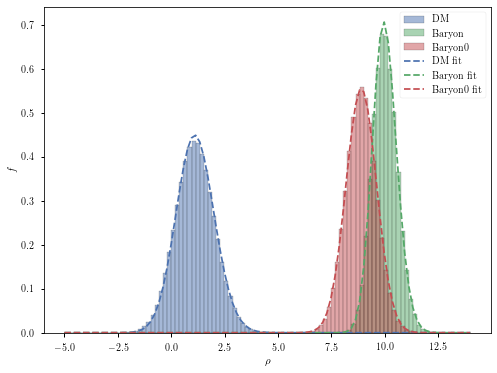

In [18]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoD_fit, rhob_fit, rhob0_fit

rhoDM = 1.10 +0.90/-0.87
rhob = 9.95 +0.59/-0.55
rhob0 = 8.90 +0.73/-0.72


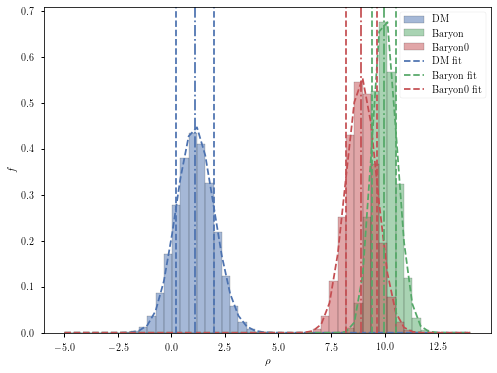

In [19]:
rhoD_low, rhoD_high = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), perc=0.68, res=1E3, min=-5, max=14)
rhoD_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_fit), x0=0.0)[0]

rhob_low, rhob_high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]

rhob0_low, rhob0_high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.71


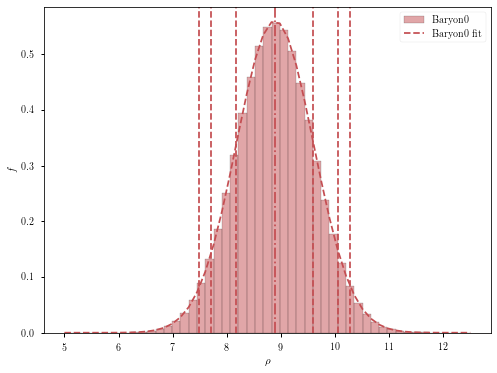

In [20]:
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
# fit with gaussian
rhob0_fit = norm.fit(rhob0)
# mode
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]
# find 
sigma_1 = 68/100
sigma_2 = 90/100
sigma_3 = 95/100
rhob0_low = {}
rhob0_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=sigma, res=1E3, min=5, max=13)
    rhob0_low[i] = low
    rhob0_high[i] = high
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for i in range(3):
    ax.axvline(rhob0_low[i], color='C2', ls='--')
    ax.axvline(rhob0_high[i], color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [21]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

for index in tqdm(range(len(dm_2_files))):
    df = np.load(dm_2_files[index])
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoD = rhob - rhob0
    print("fitting...")
    rhoD_sample = np.random.choice(rhoD, size=2000, replace=False)
    rhoD_fit = skewnorm.fit(rhoD_sample)
    rhoD_fits.append(rhoD_fit)
    rhob_sample = np.random.choice(rhob, size=2000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    print("calculating HDI...")
    rhoD_low = {}
    rhoD_high = {}
    rhob_low = {}
    rhob_high = {}
    for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), perc=sigma, res=1E3, min=-5, max=15)
        rhoD_low[i] = low
        rhoD_high[i] = high
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=5, max=13)
        rhob_low[i] = low
        rhob_high[i] = high
    print("calculating mode")
    rhoD_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_fit), x0=0.0)[0]
    rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]
    rhoD_modes.append(rhoD_mode)
    rhoD_errs.append({'low': rhoD_low, 'high': rhoD_high})
    rhob_modes.append(rhob_mode)
    rhob_errs.append({'low': rhob_low, 'high': rhob_high})

  0%|          | 0/13 [00:00<?, ?it/s]

fitting...
calculating HDI...


  8%|▊         | 1/13 [00:04<00:49,  4.11s/it]

calculating mode
fitting...
calculating HDI...


 15%|█▌        | 2/13 [00:07<00:43,  3.96s/it]

calculating mode
fitting...
calculating HDI...


 23%|██▎       | 3/13 [00:10<00:30,  3.09s/it]

calculating mode
fitting...
calculating HDI...


 31%|███       | 4/13 [00:13<00:30,  3.41s/it]

calculating mode
fitting...
calculating HDI...


 38%|███▊      | 5/13 [00:18<00:29,  3.68s/it]

calculating mode
fitting...
calculating HDI...


 46%|████▌     | 6/13 [00:22<00:26,  3.80s/it]

calculating mode
fitting...
calculating HDI...


 54%|█████▍    | 7/13 [00:26<00:23,  3.90s/it]

calculating mode
fitting...
calculating HDI...


 62%|██████▏   | 8/13 [00:30<00:19,  3.97s/it]

calculating mode
fitting...
calculating HDI...


 69%|██████▉   | 9/13 [00:34<00:16,  4.06s/it]

calculating mode
fitting...
calculating HDI...


 77%|███████▋  | 10/13 [00:38<00:12,  4.01s/it]

calculating mode
fitting...
calculating HDI...


 85%|████████▍ | 11/13 [00:42<00:07,  4.00s/it]

calculating mode
fitting...
calculating HDI...


 92%|█████████▏| 12/13 [00:46<00:03,  3.97s/it]

calculating mode
fitting...
calculating HDI...


100%|██████████| 13/13 [00:50<00:00,  3.88s/it]

calculating mode


In [23]:
rhoD_fits

[(0.8318315624548389, -0.24768588141324713, 1.0403710694168469),
 (-0.5986936627975171, 0.39487928082642654, 1.0514500181471593),
 (0.6444087243549461, -1.0386321510168395, 0.9920119671679953),
 (0.0007424865674033183, -0.4158454932727536, 0.8874428547528233),
 (0.6778629187336686, -0.3329014137972731, 1.026188070228436),
 (0.5760031405404518, -0.43706016315091867, 0.9804103917989673),
 (0.6879442395087345, 0.3179117115352822, 0.9966524750038557),
 (0.49145918994115917, 0.8045061262426596, 0.947089278806101),
 (7.119485948567059e-05, 0.1019806812337524, 0.8868936400504872),
 (0.5235917846513223, -0.4579242647309061, 0.9863303433839441),
 (0.5656726990329615, -1.4705124703359587, 0.9632520429340719),
 (0.00010255276896302823, -0.4292495973693398, 0.8784983155045791),
 (-0.5355939034506996, 0.12646692113728492, 1.015639334781523)]

(-2.0, 3.0)

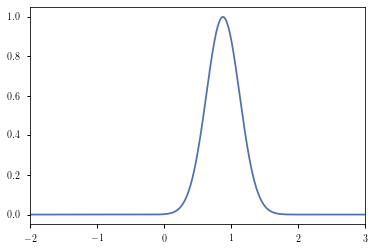

In [22]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = skewnorm.logpdf(rho, *p)
    else:
        log_rhoD += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# find max value
rho_max = np.max(rhoD_com)
# normalize
rhoD_com /= rho_max
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoD')
ax.set_xlim(-2,3)

In [23]:
from scipy.optimize import curve_fit

def skewpdf(x, a, loc, scale, alpha):
    return a * skewnorm.pdf(x, loc=loc, scale=scale, a=alpha)

rhoD_com_fit_un, _ = curve_fit(skewpdf, rho, rhoD_com, p0=[2, 1, 1.0, 2.0])
rhoD_com_fit_un

array([0.62264809, 0.81737851, 0.2552327 , 0.30014307])

(-2.0, 3.0)

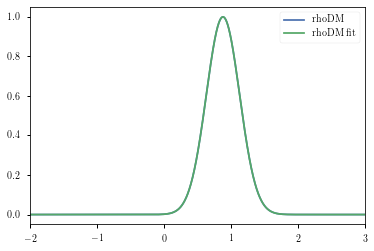

In [24]:
plt.plot(rho, rhoD_com, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoD_com_fit_un), label='rhoDM fit')
plt.legend()
plt.xlim(-2,3)

In [25]:
rhoD_com_fit = rhoD_com_fit_un[1:]
rhoD_com_low = {}
rhoD_com_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewnorm.pdf(x, *rhoD_com_fit), perc=sigma, res=1E3, min=-1, max=1)
    rhoD_com_low[i] = low
    rhoD_com_high[i] = high
rhoD_com_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_com_fit), x0=0.0)[0]

In [26]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [27]:
# for i in range(len(c)):
#     print(r"${}\leq c < {}$ & {:.02f} & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] \\".format(c1[i], c2[i], rhoDM_mode[i], rhoDM_low68[i], rhoDM_high68[i], rhoDM_low90[i], rhoDM_high90[i], rhoDM_low95[i], rhoDM_high95[i]))

In [28]:
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

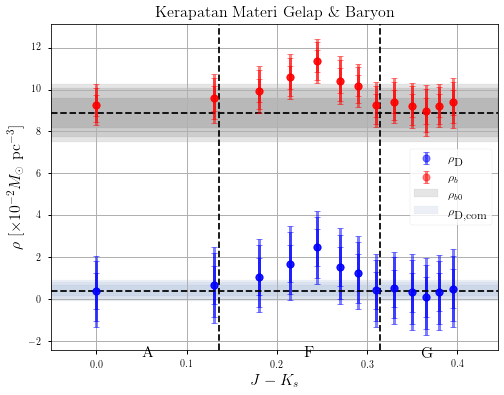

0.3955000000000004

In [31]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err['low'][i] for err in rhoD_errs])
    high = np.array([err['high'][i] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err['low'][i] for err in rhob_errs])
    high = np.array([err['high'][i] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoD_com_ax = ax.fill_between(cs, rhoD_com_low[i], rhoD_com_high[i], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{D,com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.05, -2.8, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -2.8, r'$\textup{F}$', fontsize=16)
ax.text(0.36, -2.8, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoD-no.pdf'), dpi=300)
plt.show()
rhoD_com_mode